# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Classified Data',sep=",")
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
scaler=StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [6]:
df_feat=df.drop('Unnamed: 0',axis=1)
df_feat.head()
df_feat.shape

(1000, 11)

### Train/Test split, model fit and prediction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50,random_state=101)
print(y_test.shape)

(500,)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [9]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [10]:
confusionMatrix=confusion_matrix(y_test,pred)
confusionMatrix

array([[232,  18],
       [ 26, 224]])

***Print Misclassification error rate***

In [11]:
from sklearn import metrics
print("Accuracy for test data:",str(metrics.accuracy_score(y_test, pred)*100)+"%" )
print("Error rate for label 0 = ",str(confusionMatrix[0,1]/(confusionMatrix[0,1]+confusionMatrix[0,0])*100)+"%")
print("Error rate for label 1 = ",str(confusionMatrix[1,0]/(confusionMatrix[1,0]+confusionMatrix[1,1])*100)+"%")
error_rate=((confusionMatrix[0,1]+confusionMatrix[1,0])/np.sum(confusionMatrix))*100
print("Total error rate is "+str(error_rate)+"%")

Accuracy for test data: 91.2%
Error rate for label 0 =  7.199999999999999%
Error rate for label 1 =  10.4%
Total error rate is 8.799999999999999%


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

Minimum value of array in cell 0 is 4.0
Maximum value of array in cell 0 is 9.0
Minimum value of array in cell 1 is 6.0
Maximum value of array in cell 1 is 9.5
Minimum value of array in cell 2 is 6.0
Maximum value of array in cell 2 is 9.0
Minimum value of array in cell 3 is 6.0
Maximum value of array in cell 3 is 12.0
Minimum value of array in cell 4 is 4.5
Maximum value of array in cell 4 is 10.5
Minimum value of array in cell 5 is 5.5
Maximum value of array in cell 5 is 10.0
Minimum value of array in cell 6 is 2.0
Maximum value of array in cell 6 is 6.5
Minimum value of array in cell 7 is 4.0
Maximum value of array in cell 7 is 10.5
Minimum value of array in cell 8 is 3.5000000000000004
Maximum value of array in cell 8 is 9.5
Minimum value of array in cell 9 is 5.5
Maximum value of array in cell 9 is 12.0
Minimum value of array in cell 10 is 6.0
Maximum value of array in cell 10 is 12.5
Minimum value of array in cell 11 is 5.5
Maximum value of array in cell 11 is 12.0
Minimum value 

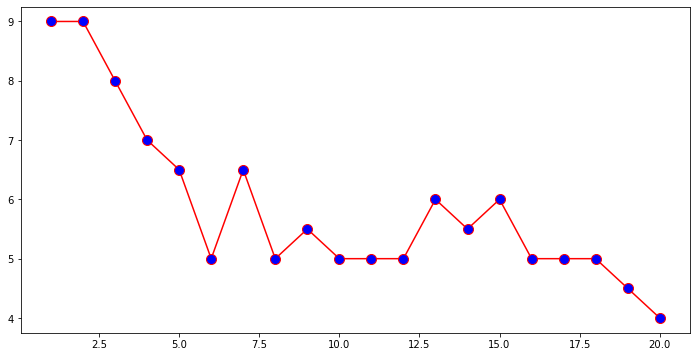

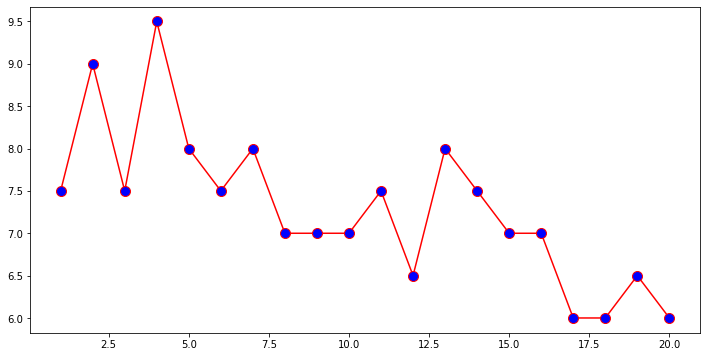

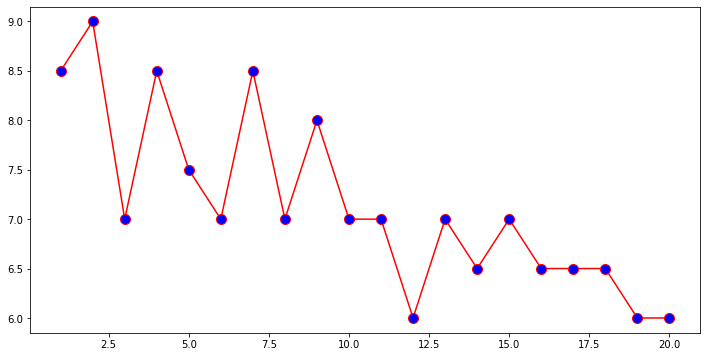

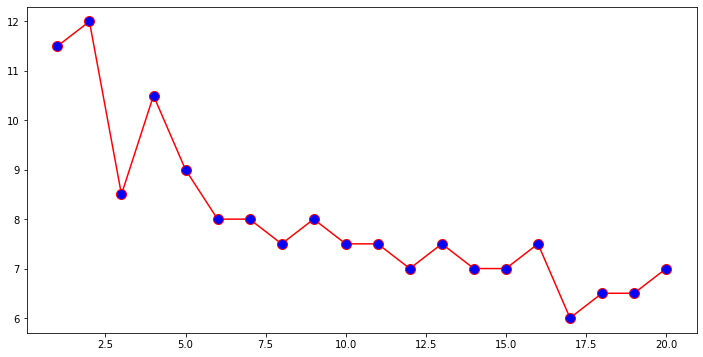

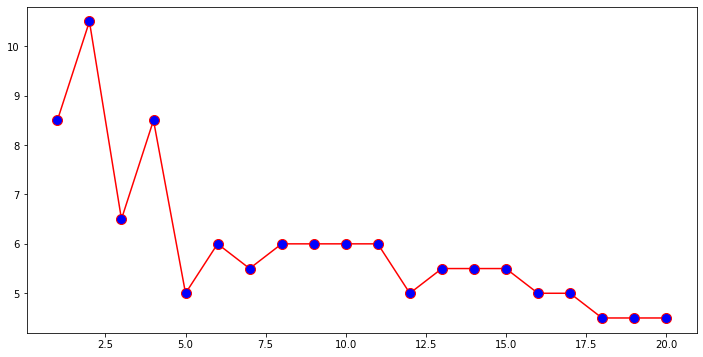

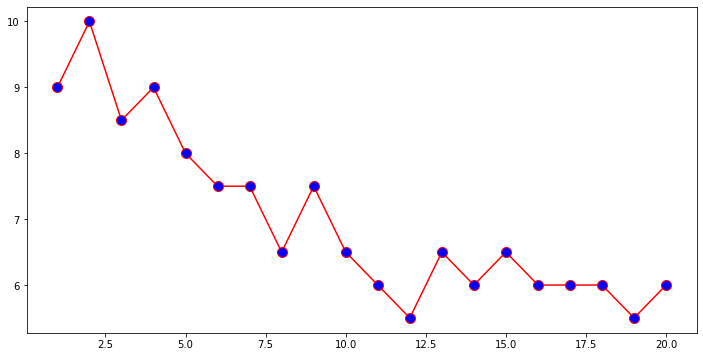

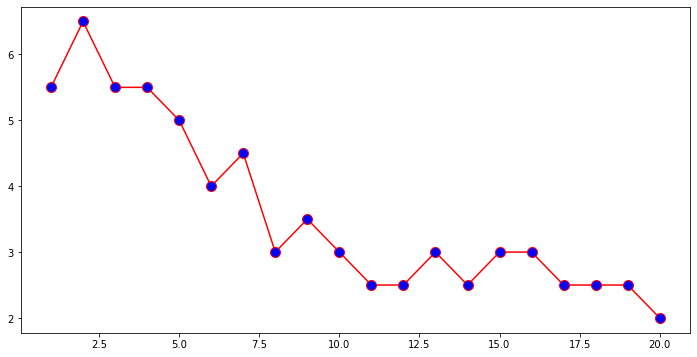

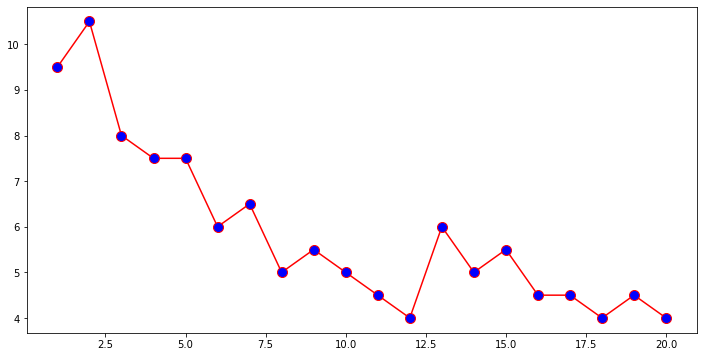

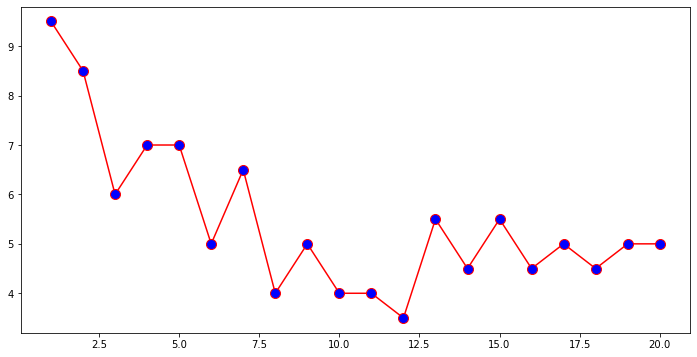

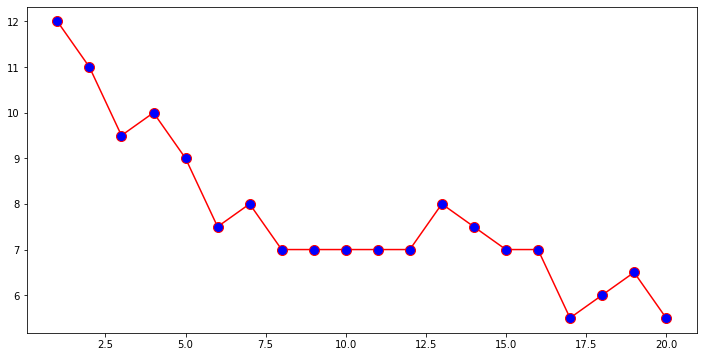

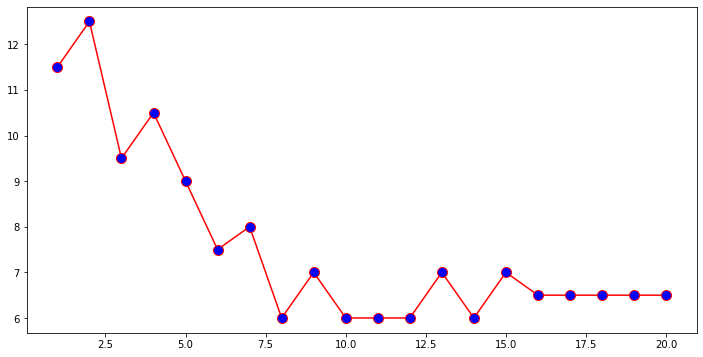

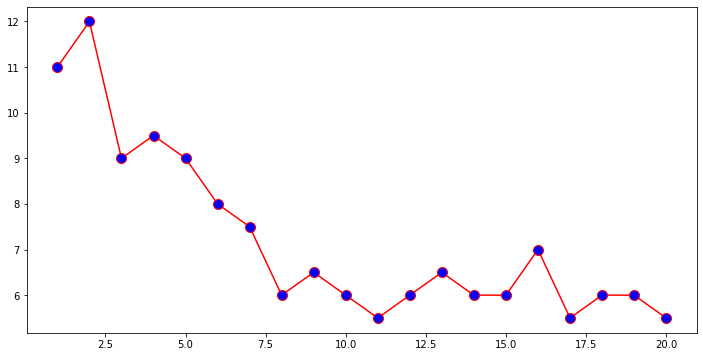

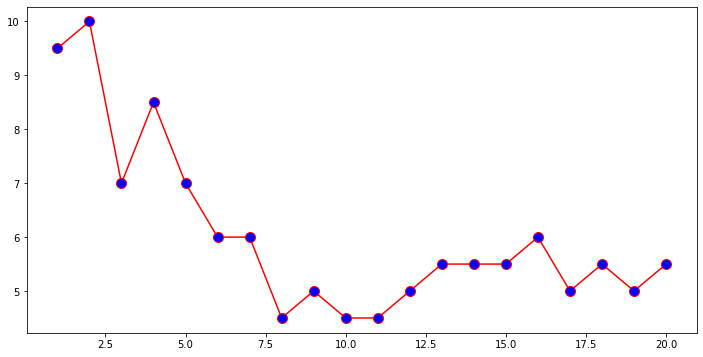

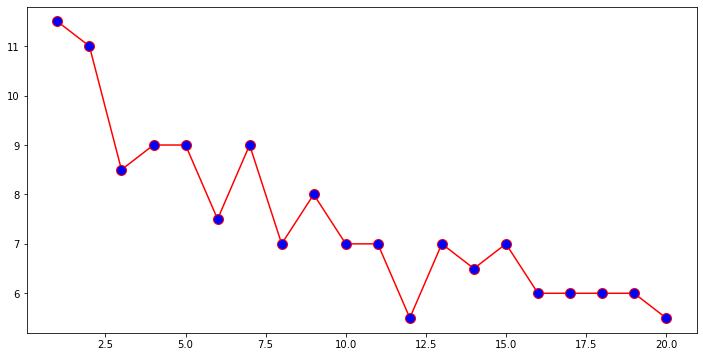

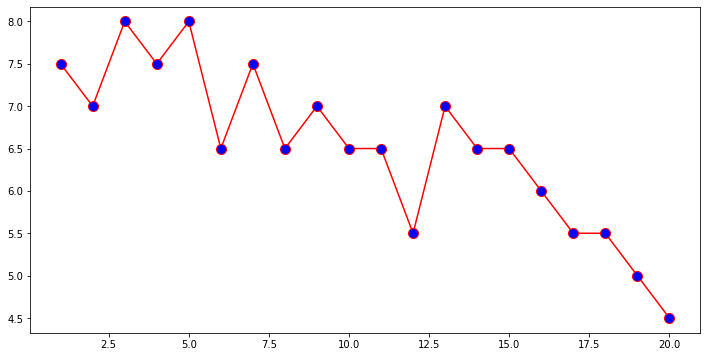

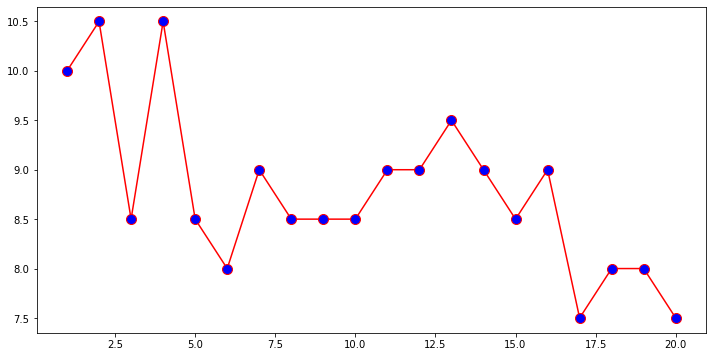

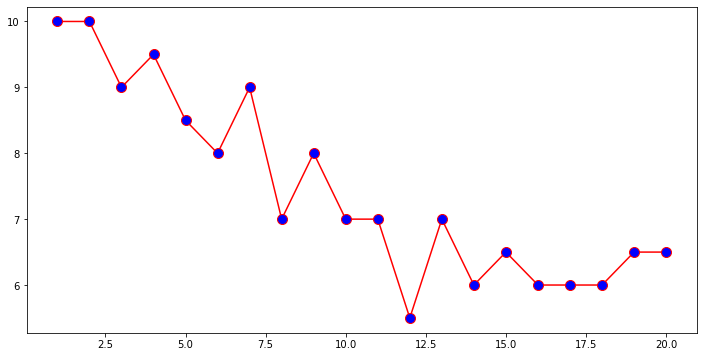

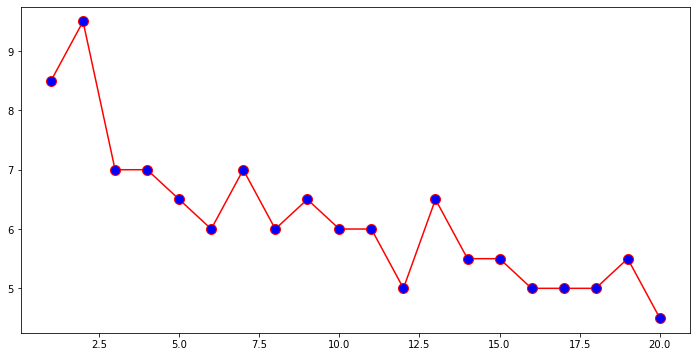

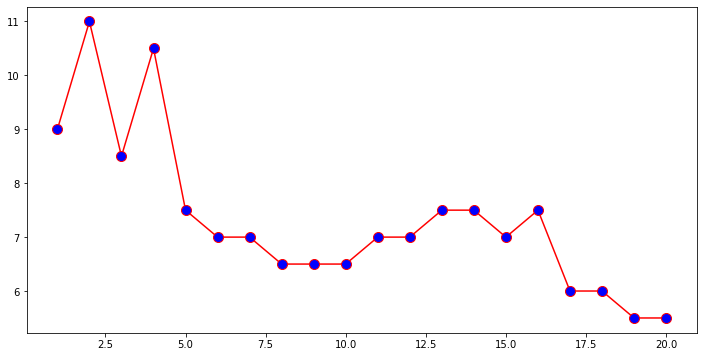

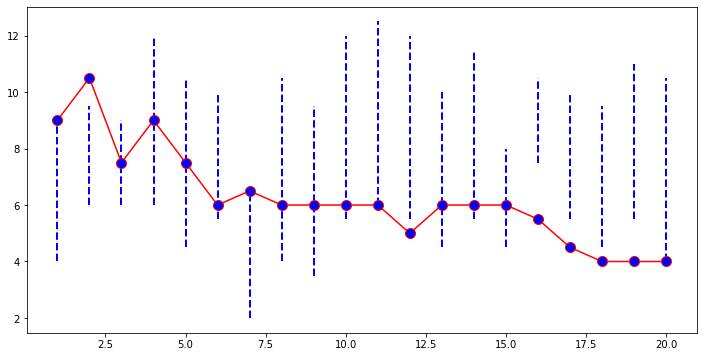

In [12]:
#In the above cell we chose the train and test size of equal length and calculated the error for this case
#Now for choosing the k we will split the data into 60% train and 40% test then this 40% test will be splitted into
#20% crossvalidation and 20% test 

#Repeating this process 5 times to choose the min and max error for k
error=[]
min_arr=[]
max_arr=[]
#Choosing the algorithm to run 20 times 
for j in range(20):
    k_errors=[]
     #This line splits the data into 60% train and 40% test
    X_Train60, X_Test40, Y_Train60, Y_Test40 = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.40, random_state=101)
     #This line splits the remainig 40% into 2 20% and random_state removed because we want the data to be chosen random each time
    X_cv, X_Test20, Y_cv, Y_test20 = train_test_split(X_Test40,Y_Test40,test_size=0.50)
    #Choosing number of neighbors(k) from 1 to 20
    for i in range(1,21):
        knn=knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_Train60,Y_Train60)
        predictions=knn.predict(X_cv)
        cm=confusion_matrix(Y_cv,predictions)
        k_errors.append(((cm[0,1]+cm[1,0])/np.sum(cm))*100)
        
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 21), k_errors, color='red', marker='o',
             markerfacecolor='blue', markersize=10)
    error.append(k_errors)
    Min_Value=min(k_errors)
    min_arr.append(Min_Value)
    Max_Value=max(k_errors)
    max_arr.append(Max_Value)
    print("Minimum value of array in cell {} is {}".format(j,min_arr[j]))
    print("Maximum value of array in cell {} is {}".format(j,max_arr[j]))

plt.vlines(x=list(range(1, 21)),ymin=min_arr,ymax=max_arr,colors='blue',ls='--',lw=2,label='vline_multiple - partial height')
print(min_arr)
print(max_arr)
    


In [13]:
print(error)

[[9.0, 9.0, 8.0, 7.000000000000001, 6.5, 5.0, 6.5, 5.0, 5.5, 5.0, 5.0, 5.0, 6.0, 5.5, 6.0, 5.0, 5.0, 5.0, 4.5, 4.0], [7.5, 9.0, 7.5, 9.5, 8.0, 7.5, 8.0, 7.000000000000001, 7.000000000000001, 7.000000000000001, 7.5, 6.5, 8.0, 7.5, 7.000000000000001, 7.000000000000001, 6.0, 6.0, 6.5, 6.0], [8.5, 9.0, 7.000000000000001, 8.5, 7.5, 7.000000000000001, 8.5, 7.000000000000001, 8.0, 7.000000000000001, 7.000000000000001, 6.0, 7.000000000000001, 6.5, 7.000000000000001, 6.5, 6.5, 6.5, 6.0, 6.0], [11.5, 12.0, 8.5, 10.5, 9.0, 8.0, 8.0, 7.5, 8.0, 7.5, 7.5, 7.000000000000001, 7.5, 7.000000000000001, 7.000000000000001, 7.5, 6.0, 6.5, 6.5, 7.000000000000001], [8.5, 10.5, 6.5, 8.5, 5.0, 6.0, 5.5, 6.0, 6.0, 6.0, 6.0, 5.0, 5.5, 5.5, 5.5, 5.0, 5.0, 4.5, 4.5, 4.5], [9.0, 10.0, 8.5, 9.0, 8.0, 7.5, 7.5, 6.5, 7.5, 6.5, 6.0, 5.5, 6.5, 6.0, 6.5, 6.0, 6.0, 6.0, 5.5, 6.0], [5.5, 6.5, 5.5, 5.5, 5.0, 4.0, 4.5, 3.0, 3.5000000000000004, 3.0, 2.5, 2.5, 3.0, 2.5, 3.0, 3.0, 2.5, 2.5, 2.5, 2.0], [9.5, 10.5, 8.0, 7.5, 7.5, 

From the last graph we can conclude that the minimum error was deduced at k=6 